# Introduction

The Lanczos algorithm is a direct algorithm devised by Cornelius Lanczos that is an adaptation of power methods to find the $m$ "most useful" (tending towards extreme highest/lowest) eigenvalues and eigenvectors of an $n\times n$ Hermitian matrix, where $m$ is often but not necessarily much smaller than $n$.

The following is an implementation of the [standard Lanczos algorithm](https://en.wikipedia.org/wiki/Lanczos_algorithm).

# Import Dependencies

We begin by importing the necessary libraries.

In [7]:
# Data Analysis
import numpy as np 
from numpy import linalg as LA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

# Utility Functions
from src.lanczos import lanczos

# Example

We test our algorithm on an example where $A=\text{diag}\;(0,\;1,\;2,\;3,\;4,\;100000)$.

In [8]:
A = np.diag([0., 1., 2., 3., 4., 100000.])
n = A.shape[1]
v_0 = np.zeros(n)
v_0.fill(1.)
v = v_0 / np.linalg.norm(v_0)

# Obtaining the tri-diagonal matrix T
T = lanczos(A, v)
print(f'Tridiagonalization of A: \n{T}')

# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
w, v = LA.eig(T)
print(f'\nAssociated eigenvalues: \n{w}')
print(f'\nAssociated eigenvectors: \n{v}')

Tridiagonalization of A: 
[[16668.333 37267.054     0.        0.        0.        0.   ]
 [37267.054 83333.667     3.464     0.        0.        0.   ]
 [    0.        3.464     2.        1.183     0.        0.   ]
 [    0.        0.        1.183     2.        1.014     0.   ]
 [    0.        0.        0.        1.014    14.59   1121.957]
 [    0.        0.        0.        0.     1121.957 99987.365]]

Associated eigenvalues: 
[100000.         0.025      3.975      1.274      2.726  99999.955]

Associated eigenvectors: 
[[-0.408  0.426 -0.426 -0.485 -0.485 -0.   ]
 [-0.913 -0.191  0.191  0.217  0.217 -0.   ]
 [-0.     0.652  0.652 -0.273  0.273  0.   ]
 [-0.    -0.531  0.531 -0.467 -0.467  0.   ]
 [-0.     0.273  0.273  0.652 -0.652  0.011]
 [-0.    -0.003 -0.003 -0.007  0.007  1.   ]]


Let's visualize the eigenvalue convergence as a function of the number of iterations.

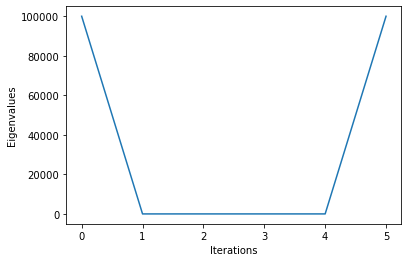

In [4]:
plt.plot(w)
plt.xlabel('Iterations')
plt.ylabel('Eigenvalues')
plt.show()